In [1]:
# Un nombre important de distributions aléatoires sont disponibles dans la librairie Distributions
using Distributions

La libraire vient avec une documentation assez complète, à l'adresse http://distributionsjl.readthedocs.io/en/latest/index.html

## Loi exponentielle

Nous nous intéressons en particulier à la distribution exponentielle, fréquemment utilisée en théorie des files d'attente pour représenter le temps entre deux arrivées, dont les propriétés sont décrites sur Wikipedia: https://en.wikipedia.org/wiki/Exponential_distribution

Sa fonction de densité est
$$ f(x) = \lambda e^{-\lambda x} $$
avec $0 < x < \infty$ ($f(x) = 0$ pour $x \leq 0$).

Le paramètre $\lambda$ est un paramètre d'échelle. Une paramétrisation alternative est de choice $\theta = 1/\lambda$, de sorte que le fonction de densité devient
$$ f(x) = \frac{1}{\theta} e^{-\frac{1}{\theta} x} $$
C'est cette paramétrisation qui est retenue en Julia, mais dans le cours théorique, nous utiliserons habituellement la première paramétrisation.

In [2]:
Pkg.add("PyPlot")

INFO: Nothing to be done


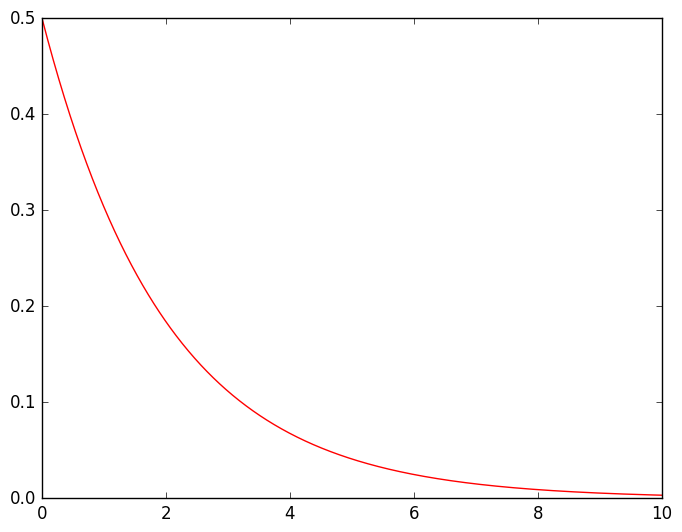

In [6]:
using PyPlot
x = linspace(0,10,1000); y = 0.5*exp(-0.5*x)
plot(x, y, color="red", linewidth=1.0, linestyle="-");

On peut créer un objet de type exponentiel avec la fonction Exponential.

In [3]:
d = Exponential() # crée une distribution exponentielle de paramètre 1
θ = 0.5  # le nom de variable peut être défini en utilisant le code LaTeX suivi de tabulation
d = Exponential(θ) # crée une distribution exponentielle de paramètre θ

Distributions.Exponential(θ=0.5)

On peut accéder aux principales caractéristiques de la distribution avec les fonctions proposées dans la librairie. Commençons par la moyenne, donnée par $1/\lambda$ ou $\theta$.

In [4]:
mean(d)

0.5

De même, la médiane est donnée par $\frac{1}{\lambda}\ln 2$.

In [5]:
median(d)

0.34657359027997264

La distribution peut être évaluée en $x$ avec la fonction pdf.

In [7]:
pdf(d, 1.0)

0.2706705664732254

In [8]:
pdf(d, -1.0)

0.0

La fonction de répartition $F[X \leq x]$ vaut $\int_0^x \lambda e^{-\lambda t} dt = 1 - e^{-\lambda x}$, et est représentée par la fonction cdf (cumulative distribution function).

In [9]:
cdf(d, 1.0)

0.8646647167633873

Le quantile $\alpha$ peut être obtenu avec la fonction quantile. Ceci revient à calculer l'inverse de la fonction de répartition: $x = F^{-1}(\alpha)$, avec
$$
F^{-1}(\alpha) = \min \lbrace x \mbox{ t.q. } F (x)  \geq \alpha \rbrace.
$$


In [10]:
quantile(d, cdf(d, 1.0))

1.0

Il s'agit de la seule loi continue qui jouit de la propriété sans mémoire:
$$
 P[X > t + x \mid X > t]
    = {P[X > t+x]\over P[X > t]} 
    = {e^{-\lambda(t+x)}\over e^{-\lambda t}} 
    = e^{-\lambda x} = P[X > x].
$$
Cette propriété simplifie beaucoup l'analyse mathématique
et l'explique la grande popularité de la loi exponentielle.

## Processus de Poisson

La distribution exponentielle est intimement reliée à la distribution (discrète) de Poisson, dont la masse de probabilité est
$$
 P[X=x] = {\lambda^x e^{-\lambda} \over x!} 
                   \mbox{ pour } x=0,1,2,\dots.
$$

Un processus stochastique est une famille $\{{Y_t},\, t\in I\}$ de variables aléatoires
définies sur un même espace de probabilité.
L'indice ${t}$ est souvent interprété comme le temps.
Le processus est en temps continu si $I$ est continu (e.g., $I = [0,\infty)$), et en temps discret si $I$ est discret (e.g., $I = \{0, 1, 2, \dots\}$).
Lorsque $t$ est continu, on note souvent $Y_t$ par $Y(t)$.
On supposera ici que $Y_t$ prend ses valeurs dans $\mathbb{R}^d$.

Un processus de comptage est un processus en temps continu $\{{N(t)},\, t\ge 0\}$, à valeurs dans $\{0,1,2,\dots\}$, et dont les trajectoires sont non décroissantes et continues à droite.

Note: Une fonction $f$ est continue à droite en un point $a$ si $\lim_{x \rightarrow a, x > a} f(x) = f(a)$.

Habituellement, $N(0)=0$, et les instants de saut
$0 < T_1\le T_2\le \ldots\le {T_j} \le \ldots$ 
s'appellent les instants d'arrivées.
Ainsi, ${N(t)}$ représente le nombre d'arrivées durant $[0,t]$, on
note ${A_j} = T_j - T_{j-1}$.
Si les $A_j$ sont des v.a. i.i.d., on a un processus de renouvellement.

Nous avons un processus de Poisson si $N(0)=0$ et
- les arrivées se font une à une (la probabilité de 2 arrivées simultanées est nulle);
- pour $s, t \ge 0$, la variable aléatoire $N(t+s) - N(t)$ est indépendente de
  $\{N(u),\, u\le t\}$ (i.e., elle ne dépend pas de l'histoire passée).

Posons ${\Lambda}(t) := E[N(t)]$.
Supposons que $\Lambda(t)$ est continue partout, et dérivable sauf possiblement en un nombre fini de points sur tout intervalle fini. Alors
- $\lambda(t) = \Lambda'(t)$ est la fonction de taux du
processus (aux points où la dérivée existe);
- $\Lambda(t) = \int_0^t \lambda(s)ds$ est la fonction de taux cumulé.

Interprétation: pour un petit $\epsilon > 0$, la probabilité
d'un saut du processus dans l'intervalle de temps $(t, t+\epsilon]$ est 
$$
P[N(t+\epsilon)-N(t) = 1] \approx 1-P[N(t+\epsilon)-N(t) = 0]
 \approx E[N(t+\epsilon)] - E[N(t)] \approx \lambda(t)\epsilon
$$
et la probabilité de plus d'un saut est $o(\epsilon)$.


Un processus de Poisson est dit stationnaire si $\lambda(t) = {\lambda} > 0$ pour tout $t\ge 0$. Si $\lambda=1$, on a un processus de Poisson standard (et donc
$\Lambda(t) = t$).

Proposition

Si $\{N(t),\,t\ge 0\}$ est un processus de Poisson et 
$t_2 > t_1 \ge 0$, alors $N(t_2) - N(t_1)$ suit la 
loi de Poisson de moyenne 
$$
  \Lambda(t_2) - \Lambda(t_1) = \int_{t_1}^{t_2} \lambda(t)dt.
$$
Dans le cas stationnaire, la moyenne est $(t_2-t_1)\lambda$.

Proposition

Un processus de comptage $\{N(t),\, t\ge 0\}$, avec $N(0)=0$, 
est un processus de Poisson stationnaire de taux $\lambda$ ssi
les variables aléatoires $A_1,A_2,\dots$ sont i.i.d. exponentielles de paramètre $\lambda$.

Dans le cas stationnaire, on peut donc générer les sauts en générant des exponentielles i.i.d.

On sait que pour un processus de Poisson, le nombre d'arrivées durant un intervalle $(t_1, t_2]$ suite une loi de Poisson$(\Lambda(t_2)-\Lambda(t_1))$. On peut donc générer ce nombre directement.
Mais comment générer ensuite les instants de ces arrivées?
Dans le cas stationnaire, c'est facile.

Proposition

Pour un processus de Poisson stationnaire, si $n$ arrivées ont eu lieu durant un intervalle $(t_1,t_2]$, alors la loi conditionnelle des temps de ces $n$ arrivées est la même que celle des statistiques d'ordre de $n$ variables aléatoires i.i.d. $U(t_1,t_2)$ (i.e. $n$ variables aléatoires i.i.d. $U(t_1,t_2)$, triées par ordre croissant).